In [1]:
import visualization as vis
import nn
import dataset as dt
import numpy as np
import cv2
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import clear_output
from ipywidgets import interact, interactive, interact_manual

from nn import NNet
from optimizers import Optimizer




## Generated figures example

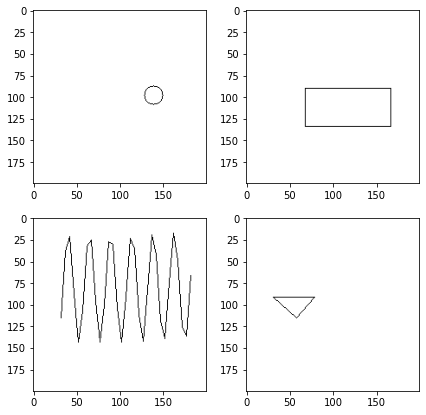

In [7]:
%matplotlib inline

fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(vis.visualize_figure(dt.create_random_circle()),cmap='gray')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(vis.visualize_figure(dt.create_random_rectangle()), cmap='gray')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(vis.visualize_figure(dt.create_random_sine()),cmap='gray')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(vis.visualize_figure(dt.create_random_triangle()),cmap='gray')
                

## Control panel

In [8]:
num_classes_widget = widgets.BoundedIntText(value=2, min=2, max=4, step=1, description='num classes:')
num_epochs_widget = widgets.BoundedIntText(value=5, min=1, max=20, step=1, description='num epochs:')
learning_rate_widget = widgets.Dropdown(options=[1e-4, 1e-3, 1e-2], value=1e-3, description='learning rate:')
samples_per_class_widget = widgets.BoundedIntText(value=1000, min=750, max=5000, step=250, description="per class:")
train_btn = widgets.Button(description='Train', button_style='')
create_btn = widgets.Button(description='Recreate', button_style='')   
test_btn = widgets.Button(description='Test', button_style='')
test_dataset_btn = widgets.Button(description='Test', button_style='')
problem_type = widgets.Dropdown(description="problem type", options=["multi-label", "multi-class"], value="multi-label")
optimizer_type = widgets.Dropdown(description="optimizer", options=["sgd", "momentum", "adam"], value="adam")

model = NNet()

def recreate_model(b):
    global model
    if problem_type.value == "multi-label":
        loss = 'mse'
    else:
        loss = "softmax"
    model = NNet(hidden_dims=[layer.value for layer in architecture], 
                 num_cls=num_classes_widget.value, loss=loss)
    print("Create model finished!")
    

def train_model(b):
    optimizer = Optimizer(optim_type=optimizer_type.value)
    samples_per_class = samples_per_class_widget.value
    X_train, y_train = dt.create_dataset(num_classes_widget.value, int(samples_per_class*0.9))
    X_val, y_val = dt.create_dataset(num_classes_widget.value, int(samples_per_class*0.1))
    model.train(X_train, y_train, X_val, y_val, optimizer, num_epochs=num_epochs_widget.value)
    print("Training finished!")
    
def test_model(b):
    #clear_output(wait=True)
    display(test_btn)
    generate_funcs = [dt.create_random_rectangle, dt.create_random_triangle,
                      dt.create_random_circle, dt.create_random_sine]
    figure_num = np.random.choice(1000) % num_classes_widget.value
    figure = generate_funcs[figure_num]()
    horizontal = np.sum(figure, axis=1)
    vertical = np.sum(figure, axis=0)
    fig_vec = np.append(horizontal, vertical)
    prediction = model.predict(fig_vec)
    label = np.argmax(prediction)
    plt.imshow(vis.visualize_figure(figure),cmap='gray')
    print(dt.label2class(label))
    all_classes = ["rectangle", "triangle", "circle", "sine"]
    for i in range(num_classes_widget.value):
        print("Prediction for %s: %.5f" % (all_classes[i], prediction[i]))
        
def test_accuracy(b):
    X_test, y_test = dt.create_dataset(num_classes_widget.value, 500)
    predictions = model.predict(X_test)
    labels = np.argmax(predictions, axis=1)
    print(np.mean(y_test == labels))
    
    
create_btn.on_click(recreate_model)
train_btn.on_click(train_model)
test_btn.on_click(test_model)
test_dataset_btn.on_click(test_accuracy)
    
    

In [9]:
architecture = []
@interact(HiddenLayers=(1, 3, 1))
def architecture_ui(HiddenLayers=1):
    global architecture
    architecture = []
    for i in range(HiddenLayers):
        architecture.append(widgets.BoundedIntText(value=100, min=10, max=1000, step=10, description='hidden %d' % (i + 1)))
    ui = widgets.HBox(architecture)
    display(ui)
                             
inputs_ui = widgets.VBox([num_classes_widget, num_epochs_widget, learning_rate_widget])
ui = widgets.HBox([inputs_ui, widgets.VBox([samples_per_class_widget, widgets.HBox([problem_type, optimizer_type]),
                                            widgets.HBox([create_btn, train_btn, test_btn, test_dataset_btn])])])
                   
display(ui)

interactive(children=(IntSlider(value=1, description='HiddenLayers', max=3, min=1), Output()), _dom_classes=('…

Create model finished!


  0%|                                                                                                                                                            | 0/5 [00:00<?, ?it/s]

In [57]:
X_test, y_test = dt.create_dataset(num_classes_widget.value, 500)
predictions = model.predict(X_test)
labels = np.argmax(predictions, axis=1)
print(np.mean(y_test == labels))

100%|██████████████████████████████████████████████| 500/500 [00:00<00:00, 8945.14it/s]

0.962


## Test